In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_excel("file:///F:/US%20Superstore%20data.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
catagorical_features = [i for i in df.columns if df.dtypes[i] == 'object']
for j in catagorical_features:
    print(j)
    print(sorted(df[j].unique())) # sort in alphabetical order

Order ID
['CA-2014-100006', 'CA-2014-100090', 'CA-2014-100293', 'CA-2014-100328', 'CA-2014-100363', 'CA-2014-100391', 'CA-2014-100678', 'CA-2014-100706', 'CA-2014-100762', 'CA-2014-100860', 'CA-2014-100867', 'CA-2014-100881', 'CA-2014-100895', 'CA-2014-100916', 'CA-2014-100972', 'CA-2014-101147', 'CA-2014-101175', 'CA-2014-101266', 'CA-2014-101364', 'CA-2014-101392', 'CA-2014-101427', 'CA-2014-101462', 'CA-2014-101476', 'CA-2014-101560', 'CA-2014-101602', 'CA-2014-101770', 'CA-2014-101833', 'CA-2014-101931', 'CA-2014-102008', 'CA-2014-102085', 'CA-2014-102274', 'CA-2014-102295', 'CA-2014-102330', 'CA-2014-102645', 'CA-2014-102652', 'CA-2014-102673', 'CA-2014-102869', 'CA-2014-102988', 'CA-2014-103058', 'CA-2014-103086', 'CA-2014-103100', 'CA-2014-103191', 'CA-2014-103219', 'CA-2014-103310', 'CA-2014-103317', 'CA-2014-103331', 'CA-2014-103366', 'CA-2014-103373', 'CA-2014-103401', 'CA-2014-103429', 'CA-2014-103492', 'CA-2014-103527', 'CA-2014-103590', 'CA-2014-103660', 'CA-2014-103702', 

In [7]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [8]:
df[df.duplicated(subset = None, keep = False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [9]:
df=pd.DataFrame.drop_duplicates(df)
df.shape

(9994, 21)

In [10]:
df=df.drop(['Country'],axis=1)

In [11]:
df = df.drop(['Postal Code'], axis = 1)

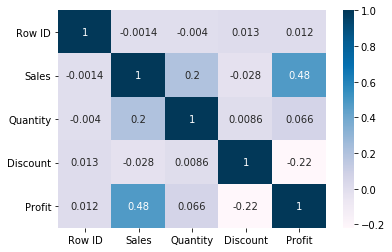

In [12]:
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [14]:
round(sum(df['Sales']),2)

2297200.86

In [15]:
round(sum(df['Quantity']),2)

37873

In [16]:
round(sum(df['Profit']),3)

286397.022

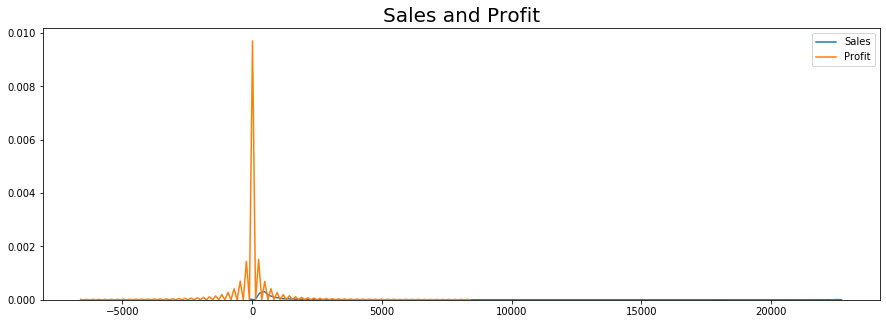

In [17]:
plt.figure(figsize = (15, 5))
sns.kdeplot(df['Sales'])
sns.kdeplot(df['Profit'])

plt.title('Sales and Profit', fontsize = 20)
plt.show()

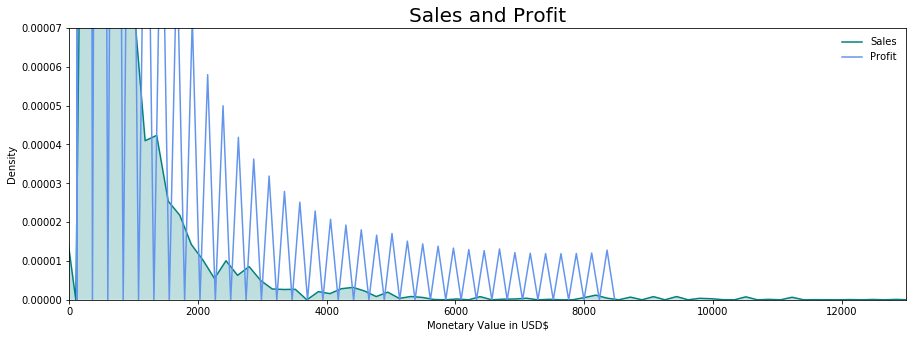

In [18]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()


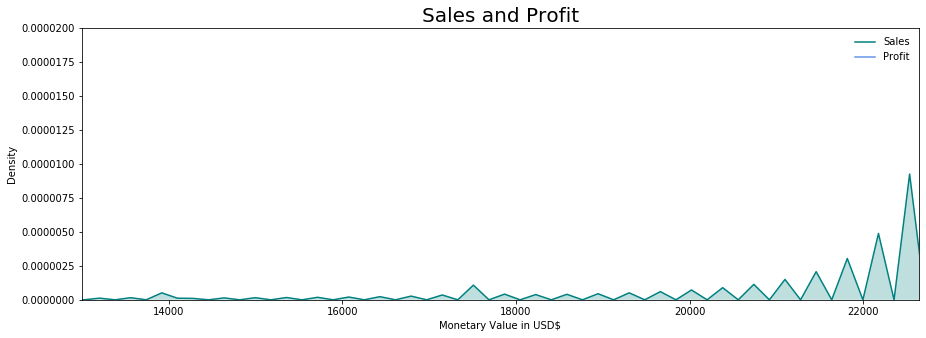

In [19]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

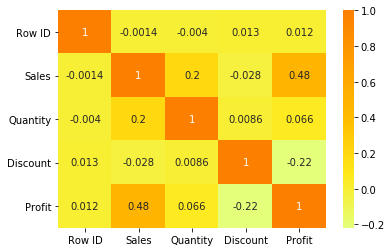

In [20]:
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

Text(0.5, 1.0, 'Category')

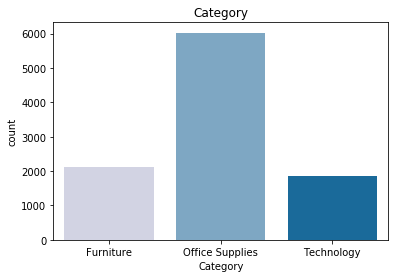

In [21]:
sns.countplot(df['Category'],palette = 'PuBu')
plt.title('Category')

Text(0.5, 1.0, 'Segment')

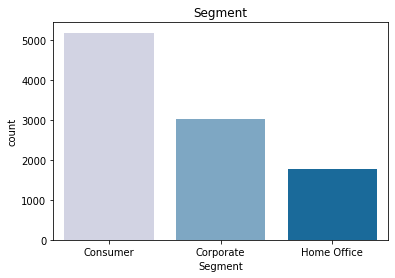

In [22]:
sns.countplot(df['Segment'],palette = 'PuBu')
plt.title('Segment')

Text(0.5, 1.0, 'Ship Mode')

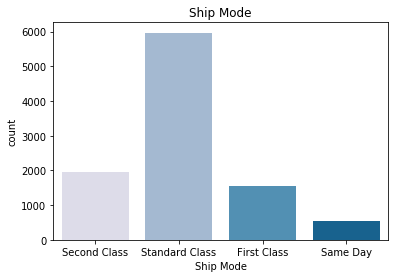

In [23]:
sns.countplot(df['Ship Mode'],palette = 'PuBu')
plt.title('Ship Mode')

Text(0.5, 1.0, 'Region')

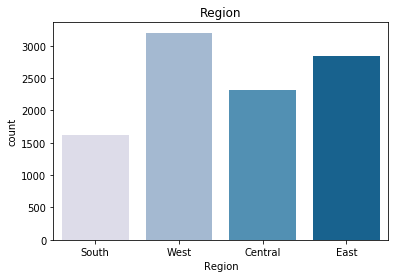

In [24]:
sns.countplot(df['Region'],palette = 'PuBu')
plt.title('Region')

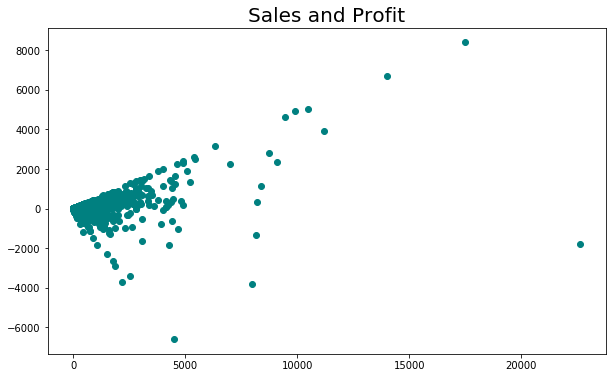

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df["Sales"] , df["Profit"], color = 'Teal')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

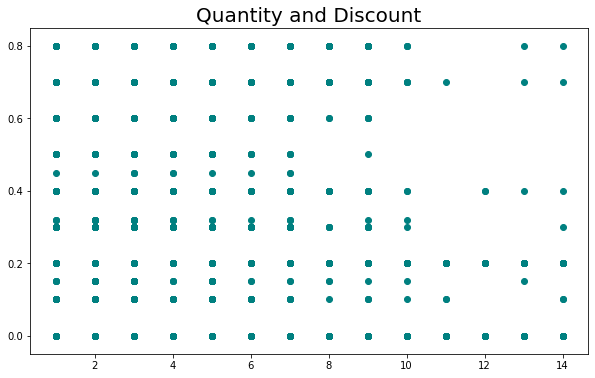

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df["Quantity"] , df["Discount"], color = 'Teal')
plt.title('Quantity and Discount', fontsize = 20)
plt.show()

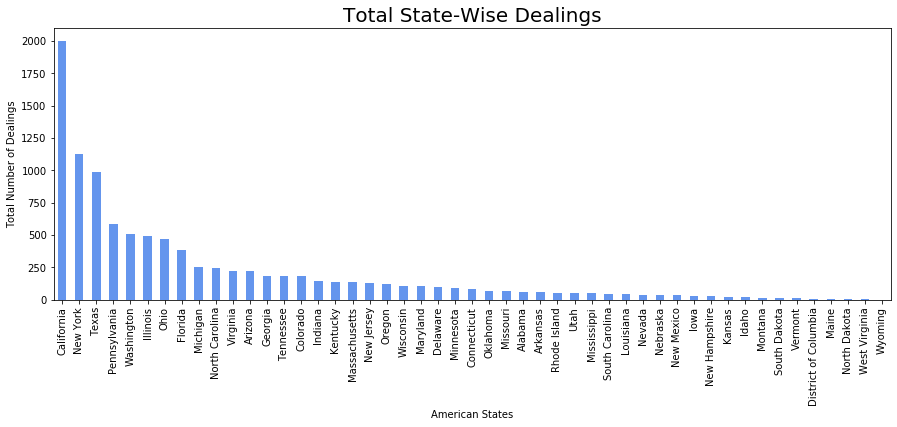

In [27]:
df_state_dealings = df.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                    color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

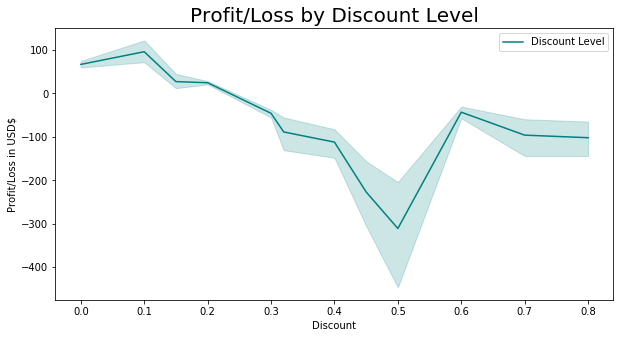

In [28]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = df, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

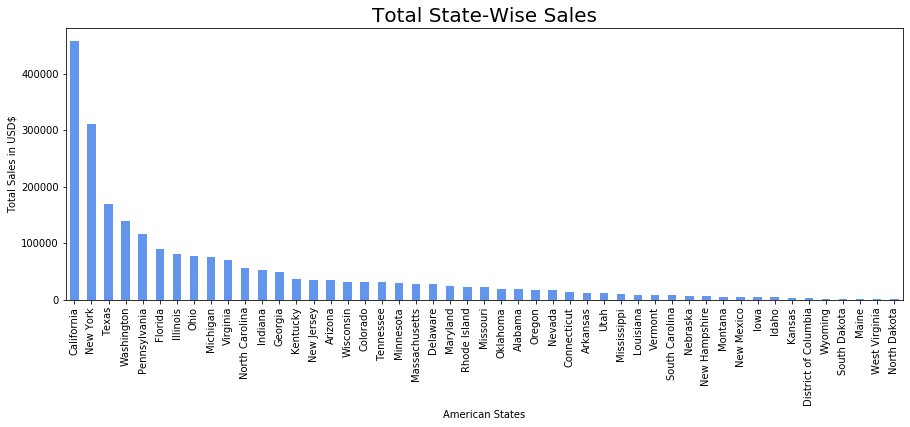

In [29]:
df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

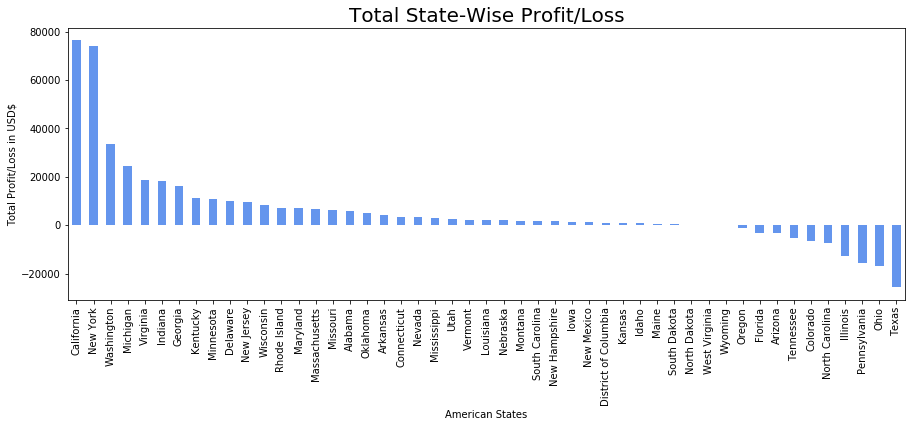

In [30]:
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

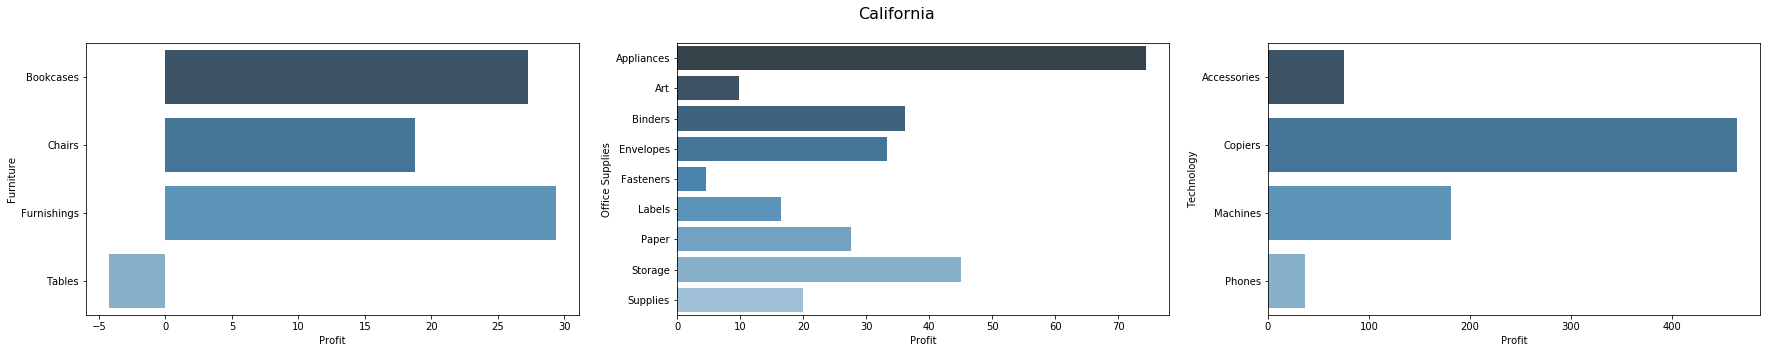

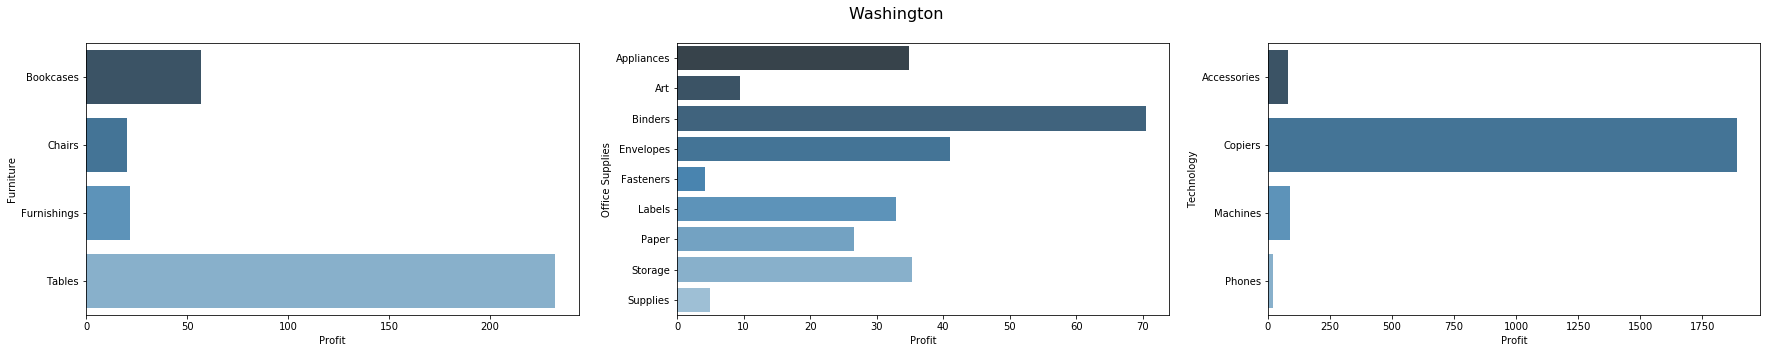

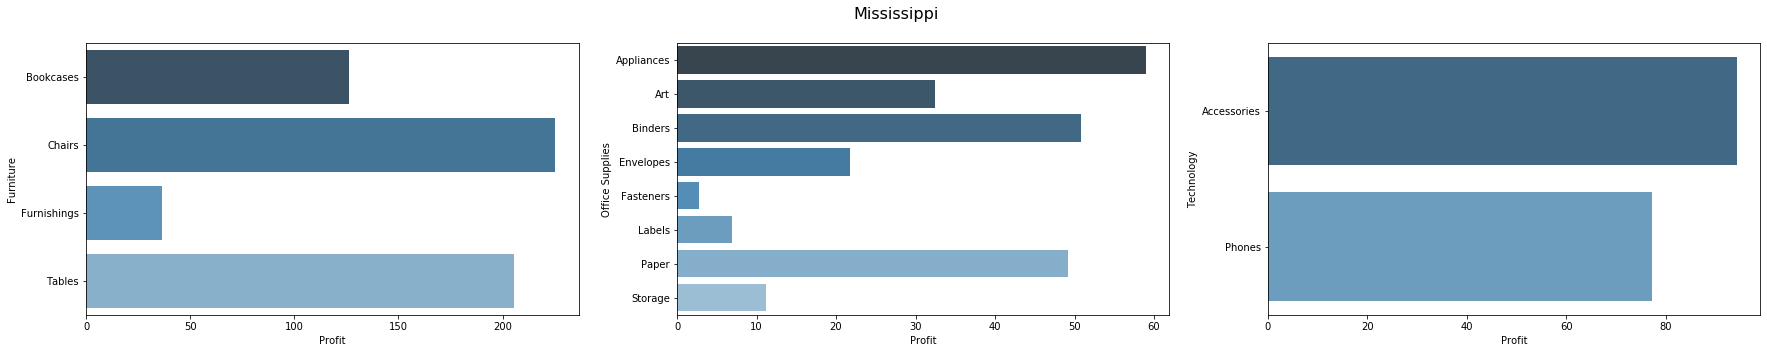

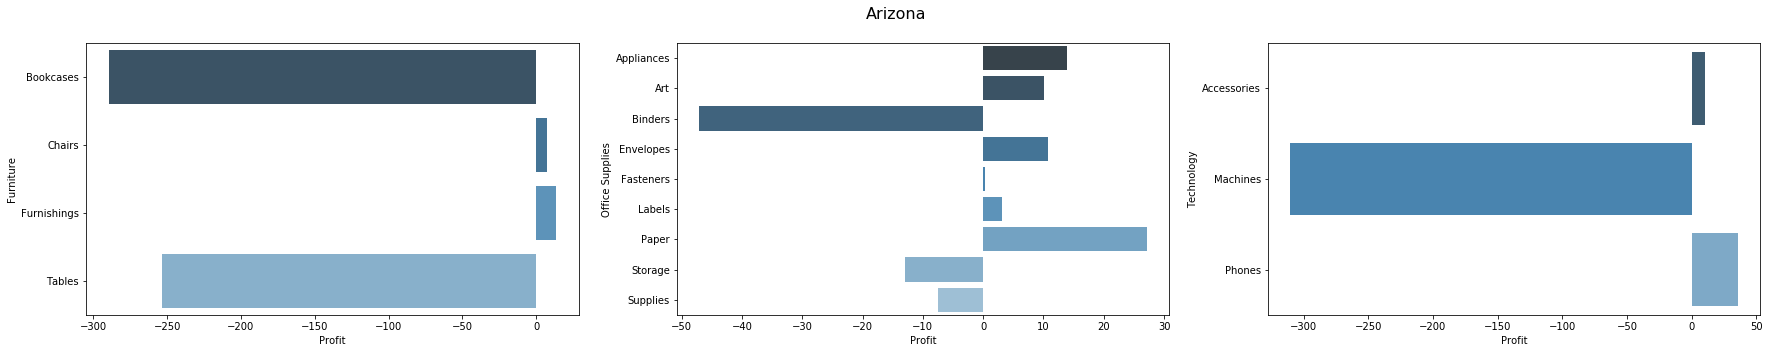

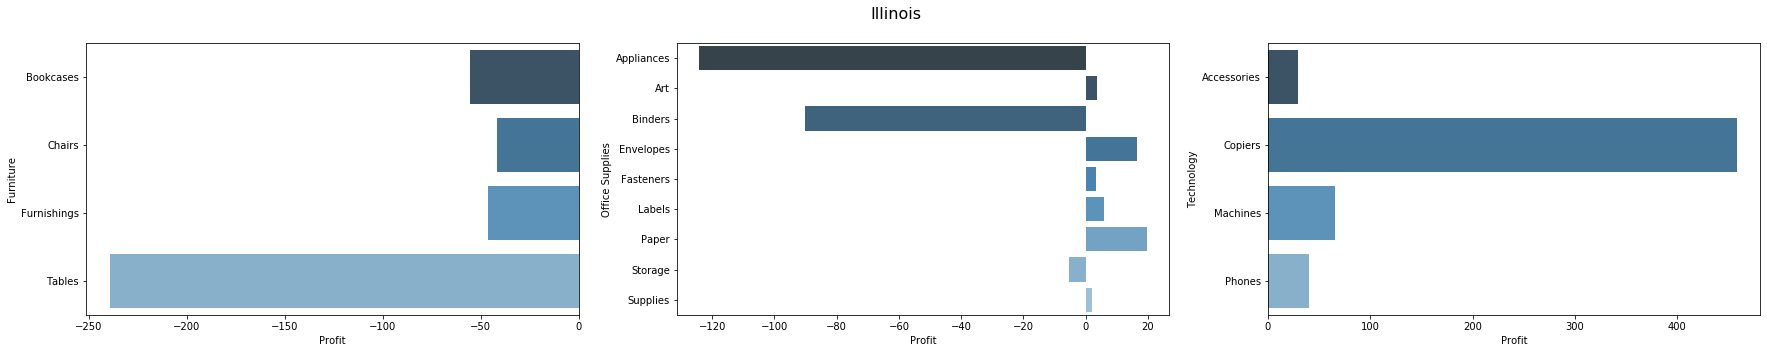

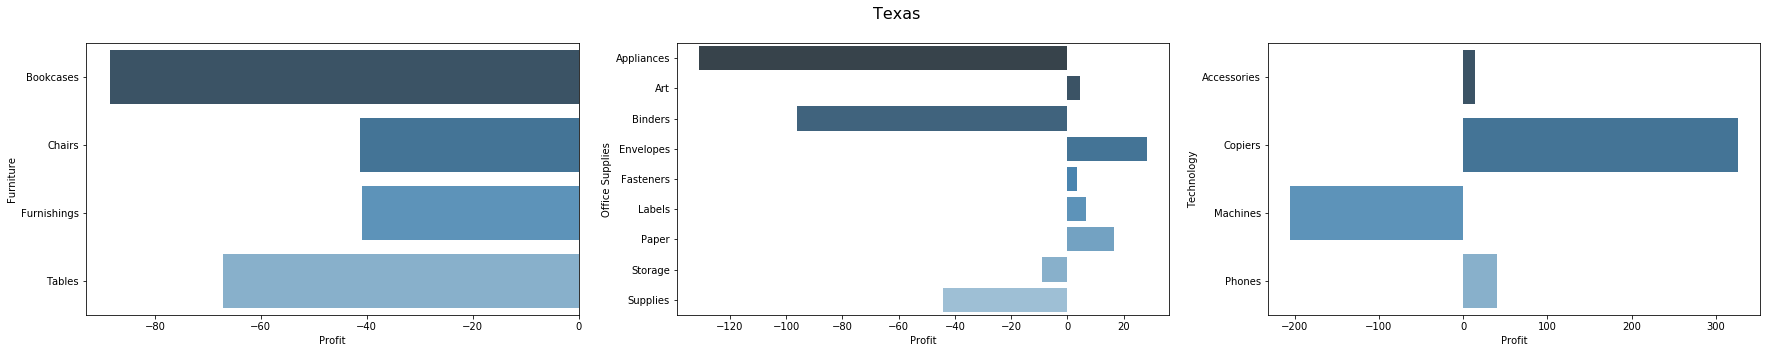

In [31]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Illinois', 'Texas']
state_data_viewer(states)

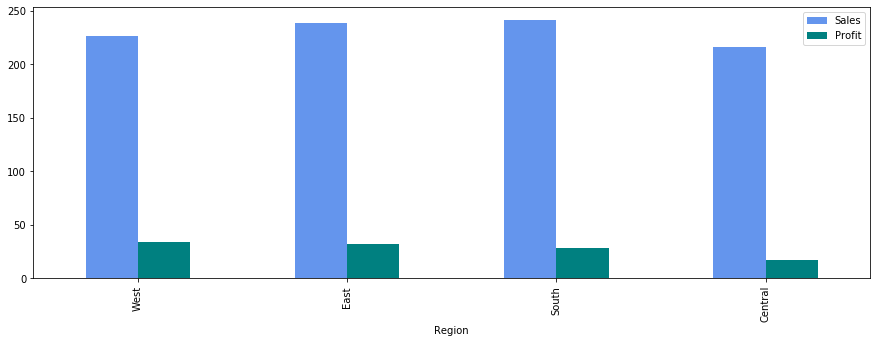

In [32]:
colors = ['Cornflowerblue', 'Teal']
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

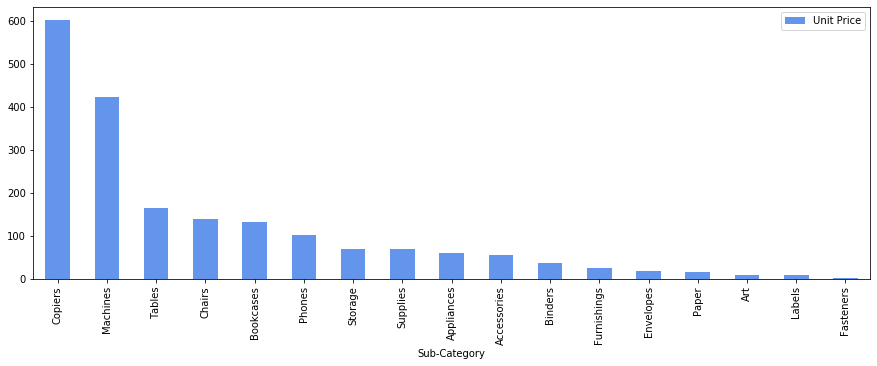

In [33]:
df['Unit Price'] = df.Sales / df.Quantity

# Unit Profit calculation
df['Unit Profit'] = df.Profit / df.Quantity 

# Unit Price of Sub-Category
df_subcategory = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit', 'Unit Price', 'Unit Profit']].mean()
df_subcategory.sort_values('Unit Price', ascending = False)[['Unit Price']].plot(kind = 'bar',
                                                                                 figsize = (15, 5),
                                                                                 color = 'Cornflowerblue')

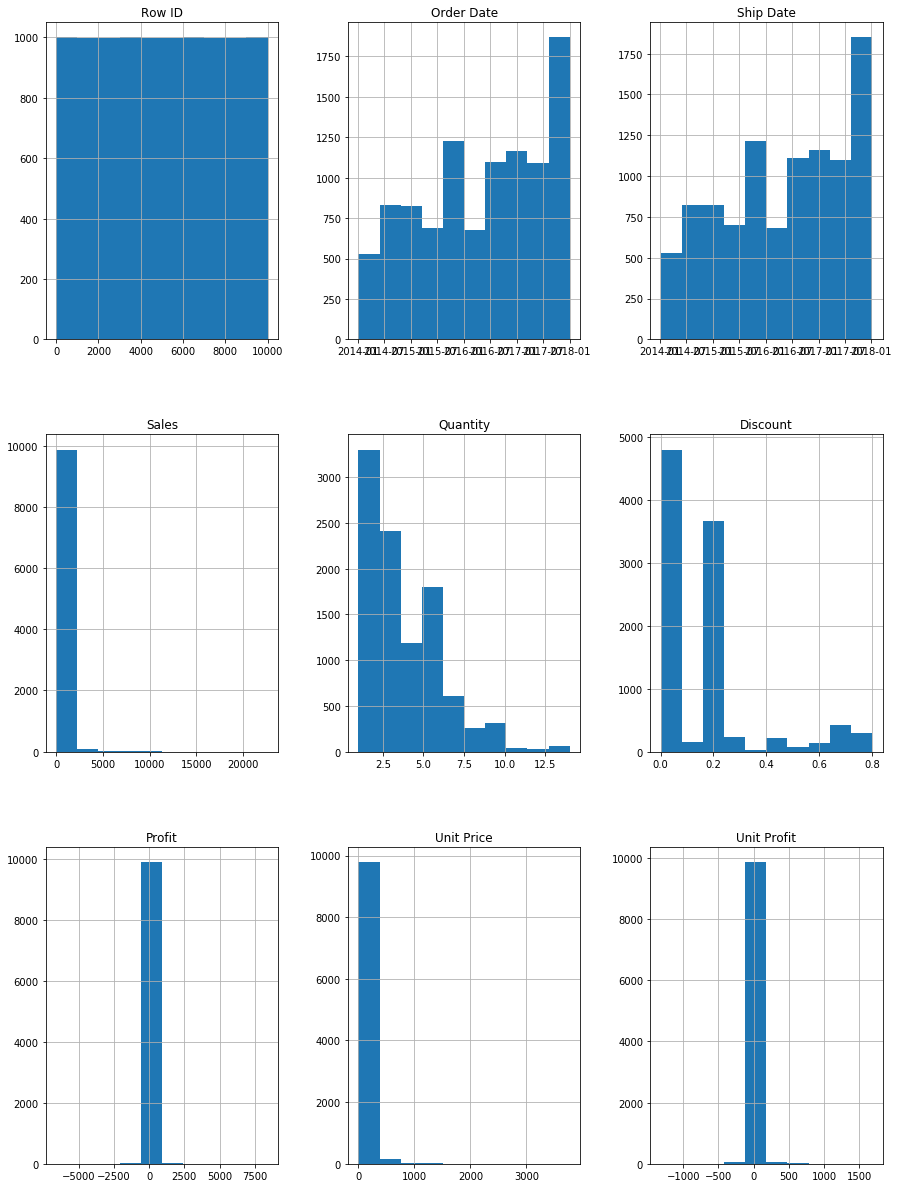

In [34]:
df.hist(figsize=(15,21))
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Unit Price', 'Unit Profit'],
      dtype='object')

In [38]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price,Unit Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,130.98,20.9568
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,243.98,73.1940
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,7.31,3.4357


In [39]:
# transactions with Discount
df_discounted = df[df['Discount'] > 0]

# transactions without Discount
df_no_discount = df[df['Discount'] == 0]

print ("On Average :")

print("Discounted Sales per transaction is USD$", round(df_discounted['Sales'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].mean(), 2))

print("Discounted Unit Price is USD$", round(df_discounted['Unit Price'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Price'].mean(), 2))

print("Discounted Quantity purchased per transaction is ", round(df_discounted['Quantity'].mean(), 2), 
      ", without is ", round(df_no_discount['Quantity'].mean(), 2))

print("Discounted Profit per transaction is USD$", round(df_discounted['Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].mean(), 2))

print("Discounted Unit Profit is USD$", round(df_discounted['Unit Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Profit'].mean(), 2))

print(" ")

print ("In Total :")

print("Discounted Total Sales is USD$", round(df_discounted['Sales'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].sum(), 2))

print("Discounted Total Quantity is ", round(df_discounted['Quantity'].sum(), 2), 
      ", without is ", round(df_no_discount['Quantity'].sum(), 2))

print("Discounted Total Profit is USD$", round(df_discounted['Profit'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].sum(), 2))

On Average :
Discounted Sales per transaction is USD$ 232.74 , without is USD$ 226.74
Discounted Unit Price is USD$ 62.78 , without is USD$ 58.91
Discounted Quantity purchased per transaction is  3.77 , without is  3.81
Discounted Profit per transaction is USD$ -6.66 , without is USD$ 66.9
Discounted Unit Profit is USD$ -1.23 , without is USD$ 17.58
 
In Total :
Discounted Total Sales is USD$ 1209292.39 , without is USD$ 1087908.47
Discounted Total Quantity is  19606 , without is  18267
Discounted Total Profit is USD$ -34590.58 , without is USD$ 320987.6


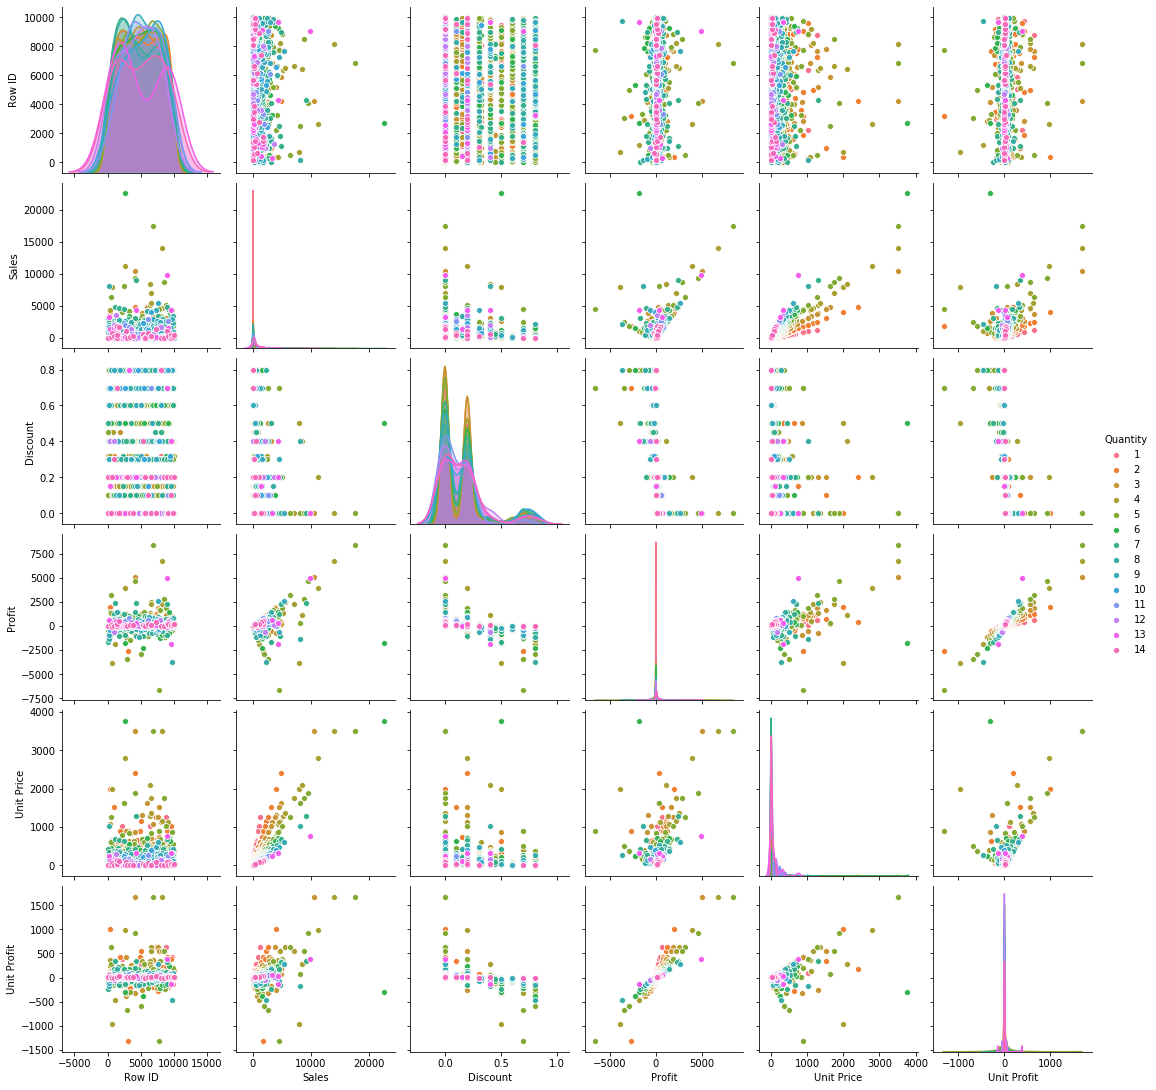

In [41]:
sns.pairplot(data=df,hue="Quantity")